## 向量场 笛卡尔坐标

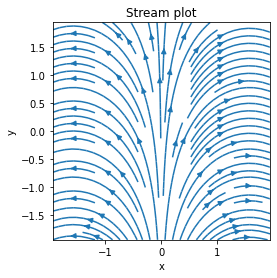

In [20]:
from pde import CartesianGrid, VectorField

grid = CartesianGrid([[-2, 2], [-2, 2]], 32) # 生成坐标系
field = VectorField.from_expression(grid, ["sin(x)", "cos(x)"]) # 生成向量场
field.plot(method="streamplot", title="Stream plot")

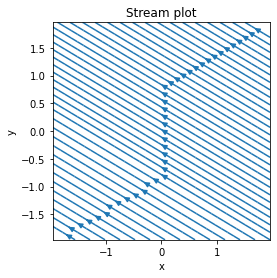

In [25]:
from pde import CartesianGrid, VectorField

grid = CartesianGrid([[-2, 2], [-2, 2]], 50) # 生成坐标系
field = VectorField.from_expression(grid, ["-5", "3"])
field.plot(method="streamplot", title="Stream plot")

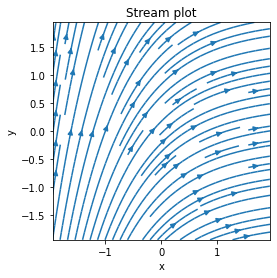

In [28]:
from pde import CartesianGrid, VectorField

grid = CartesianGrid([[-2, 2], [-2, 2]], 32) # 生成坐标系
field = VectorField.from_expression(grid, ["exp(x)", "1"])
field.plot(method="streamplot", title="Stream plot")

## 标量场 笛卡尔坐标

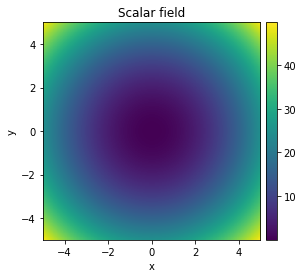

In [15]:
from pde import CartesianGrid, ScalarField

grid = CartesianGrid([[-5, 5], [-5, 5]], 500) # 生成坐标系
field = ScalarField.from_expression(grid, "x**2 + y**2")
field.plot(title="Scalar field")

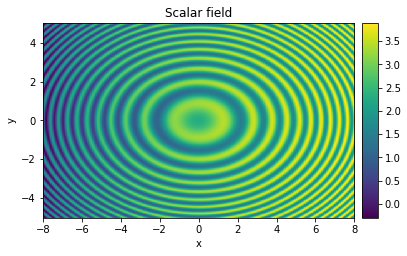

In [33]:
from pde import CartesianGrid, ScalarField

grid = CartesianGrid([[-8, 8], [-5, 5]], 500) # 生成坐标系
field = ScalarField.from_expression(grid, "sin(x**2 + 2*y**2) + log(x+10)")
field.plot(title="Scalar field")

## 标量场 柱坐标

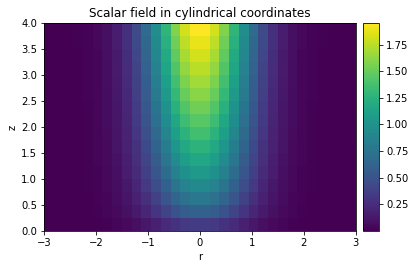

In [34]:
from pde import CylindricalSymGrid, ScalarField

grid = CylindricalSymGrid(radius=3, bounds_z=[0, 4], shape=16)
field = ScalarField.from_expression(grid, "sqrt(z) * exp(-r**2)")
field.plot(title="Scalar field in cylindrical coordinates")

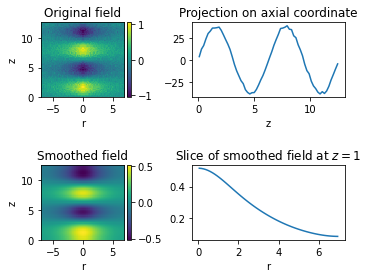

In [41]:
"""
高斯模糊去除噪点
"""

import matplotlib.pyplot as plt
import numpy as np

from pde import CylindricalSymGrid, ScalarField

# create a scalar field with some noise
grid = CylindricalSymGrid(7, [0, 4 * np.pi], 64)
data = ScalarField.from_expression(grid, "sin(z) * exp(-r / 3)")
data += 0.05 * ScalarField.random_normal(grid)

# manipulate the field
smoothed = data.smooth()  # Gaussian smoothing to get rid of the noise
projected = data.project("r")  # integrate along the radial direction
sliced = smoothed.slice({"z": 1})  # slice the smoothed data

# create four plots of the field and the modifications
fig, axes = plt.subplots(nrows=2, ncols=2)
data.plot(ax=axes[0, 0], title="Original field")
smoothed.plot(ax=axes[1, 0], title="Smoothed field")
projected.plot(ax=axes[0, 1], title="Projection on axial coordinate")
sliced.plot(ax=axes[1, 1], title="Slice of smoothed field at $z=1$")
plt.subplots_adjust(hspace=.9)
plt.show()